In [20]:
!pip install jieba
import jieba
import re
import os
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.rcParams['font.sans-serif'] = "SimHei"

In [21]:


# 计算 TTR（词汇多样性）——ratio, 已经是相对指标
def compute_TTR(text):
    tokens = list(jieba.cut(text))
    total_tokens = len(tokens)
    unique_tokens = len(set(tokens))
    return unique_tokens / total_tokens if total_tokens != 0 else 0

# 统计中文人称代词（第一、第二、第三人称）的绝对出现次数
def count_pronouns(text):
    # 请根据实际文本需要扩充代词列表
    first_person = ["我", "我們", "咱們"]
    second_person = ["你", "妳", "你們", "妳們"]
    third_person = ["他", "她", "它", "牠", "他們", "她們", "它們", "牠們"]
    
    tokens = list(jieba.cut(text))
    counts = Counter(tokens)
    
    first_count = sum(counts[p] for p in first_person)
    second_count = sum(counts[p] for p in second_person)
    third_count = sum(counts[p] for p in third_person)
    
    return first_count, second_count, third_count

# 提取直接引语，依赖于文本中使用的中文引号
def extract_direct_quotes(text):
    # 匹配 「...」、『...』、“...”
    pattern = r'[「『“][^「『”」』]*[」』”]'
    quotes = re.findall(pattern, text)
    return quotes

# 指定数据文件夹路径
folder_path = '/Users/fht/Desktop/EPFL/Semester 2/Digital History/dataset/文学'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

results = []

for file_name in file_list:
    full_path = os.path.join(folder_path, file_name)
    
    # 读取文本内容
    with open(full_path, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # 使用 jieba 分词获得 token 数量
    tokens = list(jieba.cut(text))
    token_count = len(tokens)
    
    # 1. 计算 TTR
    ttr_value = compute_TTR(text)
    
    # 2. 统计人称代词（绝对值）
    f_count, s_count, t_count = count_pronouns(text)
    
    # 3. 提取直接引语
    quotes = extract_direct_quotes(text)
    num_quotes = len(quotes)
    quotes_total_chars = sum(len(q) for q in quotes)
    
    # 以下各指标归一化为相对比例（除以 token 数，即文章长度）
    norm_first = f_count / token_count if token_count else 0
    norm_second = s_count / token_count if token_count else 0
    norm_third = t_count / token_count if token_count else 0
    norm_direct_quotes = num_quotes / token_count if token_count else 0
    norm_quotes_chars = quotes_total_chars / token_count if token_count else 0
    
    # 将结果汇总到结果列表
    results.append({
        'FileName': file_name,
        'TokenCount': token_count,
        'TTR': ttr_value,
        'FirstPersonCount': f_count,
        'SecondPersonCount': s_count,
        'ThirdPersonCount': t_count,
        'NormalizedFirstPerson': norm_first,
        'NormalizedSecondPerson': norm_second,
        'NormalizedThirdPerson': norm_third,
        'DirectQuotesCount': num_quotes,
        'DirectQuotesTotalChars': quotes_total_chars,
        'NormalizedDirectQuotesCount': norm_direct_quotes,
        'NormalizedDirectQuotesChars': norm_quotes_chars
    })

# 将结果转换为 DataFrame 以便查看和后续处理
df = pd.DataFrame(results)
df


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ww/0cs7zdg14jsc23xxm7ngz1fc0000gn/T/jieba.cache
Loading model cost 0.360 seconds.
Prefix dict has been built successfully.


,FileName,TokenCount,TTR,FirstPersonCount,SecondPersonCount,ThirdPersonCount,NormalizedFirstPerson,NormalizedSecondPerson,NormalizedThirdPerson,DirectQuotesCount,DirectQuotesTotalChars,NormalizedDirectQuotesCount,NormalizedDirectQuotesChars
0,第凡內早餐-朱天心-1995.txt,9649,0.310809,219,30,147,0.022697,0.003109,0.015235,24,183,0.002487,0.018966
1,帶我去吧月光-朱天文-1989.txt,23873,0.277761,100,101,806,0.004189,0.004231,0.033762,1,10,0.000042,0.000419
2,蘇偉貞-過站不停-1991.txt,45564,0.168049,577,282,1917,0.012664,0.006189,0.042073,595,8921,0.013059,0.195791
3,夢書-蘇偉貞-1995.txt,21373,0.211061,596,121,371,0.027886,0.005661,0.017358,132,1389,0.006176,0.064989
4,世紀末的華麗-朱天文-1990.txt,6856,0.447783,4,1,215,0.000583,0.000146,0.031359,0,0,0.000000,0.000000
5,张大春-四喜憂國-1987.txt,7429,0.314982,84,76,120,0.011307,0.010230,0.016153,177,3545,0.023826,0.477184
6,肉身菩薩-朱天文-1988.txt,6930,0.349062,32,33,256,0.004618,0.004762,0.036941,93,1189,0.013420,0.171573
7,租書店的女兒-蘇偉貞-2008.txt,64162,0.236838,453,1108,614,0.007060,0.017269,0.009570,706,9937,0.011003,0.154874
8,從前從前有個浦島太郎-朱天心-1990.txt,11208,0.345824,58,33,426,0.005175,0.002944,0.038009,82,2390,0.007316,0.213241
9,威尼斯之死-朱天心-1992.txt,9197,0.328477,277,24,112,0.030119,0.002610,0.012178,20,285,0.002175,0.030988


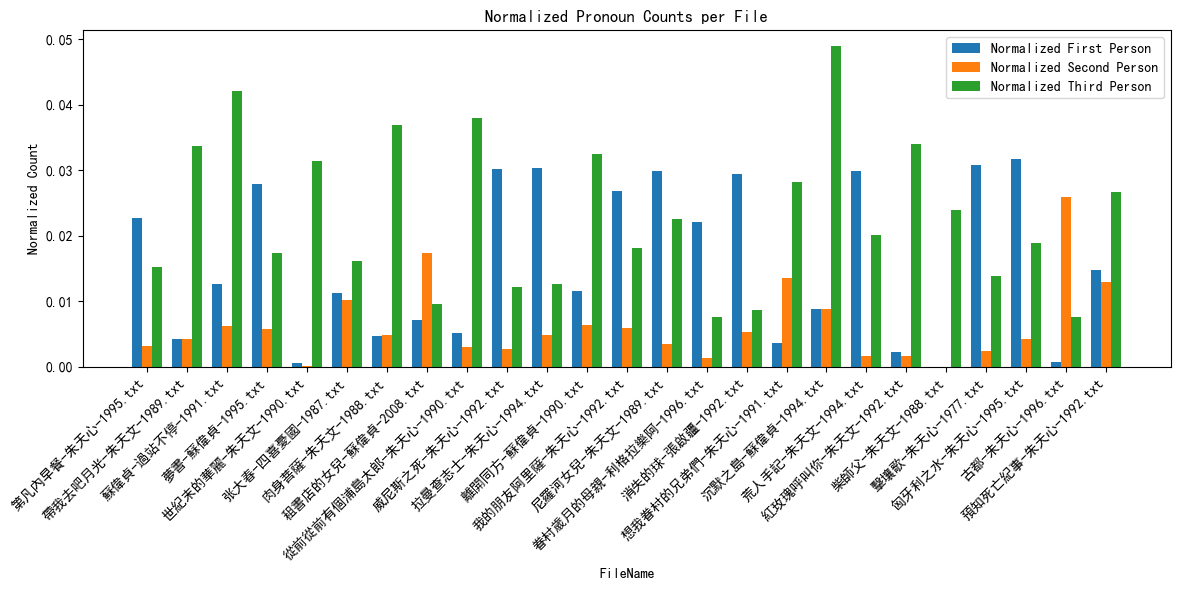

In [22]:
# 设置绘图的基本参数
x = np.arange(len(df))
bar_width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, df['NormalizedFirstPerson'], width=bar_width, label='Normalized First Person')
plt.bar(x, df['NormalizedSecondPerson'], width=bar_width, label='Normalized Second Person')
plt.bar(x + bar_width, df['NormalizedThirdPerson'], width=bar_width, label='Normalized Third Person')

plt.xticks(x, df['FileName'], rotation=45, ha='right')
plt.xlabel('FileName')
plt.ylabel('Normalized Count')
plt.title('Normalized Pronoun Counts per File')
plt.legend()
plt.tight_layout()
plt.show()


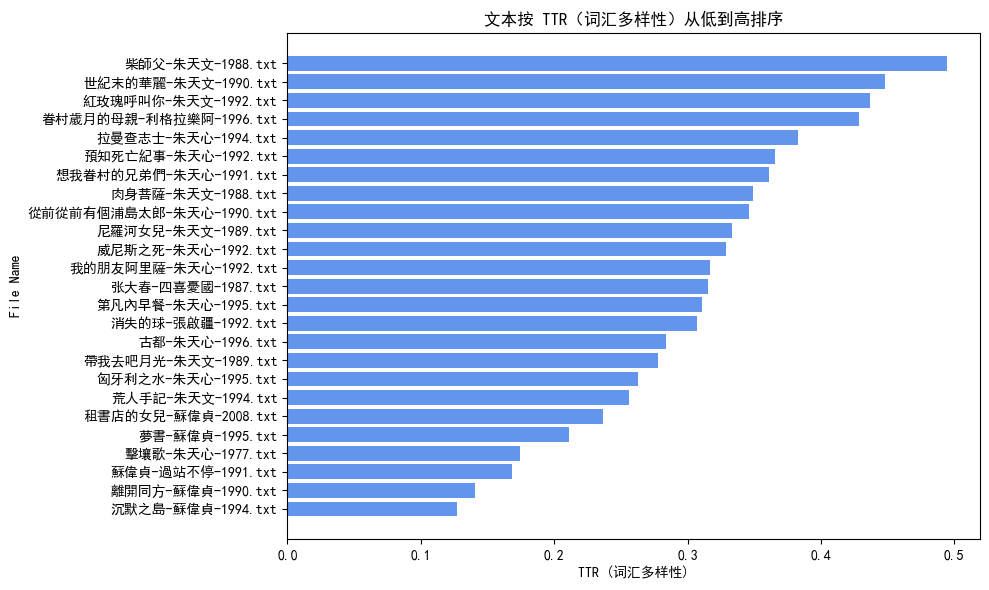

In [ ]:

# 按 TTR 从低到高排序
sorted_df = df.sort_values(by='TTR', ascending=True)

# 画横向条形图（方便显示较长文件名）
plt.figure(figsize=(10, 6))
plt.barh(sorted_df['FileName'], sorted_df['TTR'], color='cornflowerblue')
plt.xlabel('TTR (词汇多样性)')
plt.ylabel('File Name')
plt.title('文本按 TTR（词汇多样性）从低到高排序')
plt.tight_layout()
plt.show()


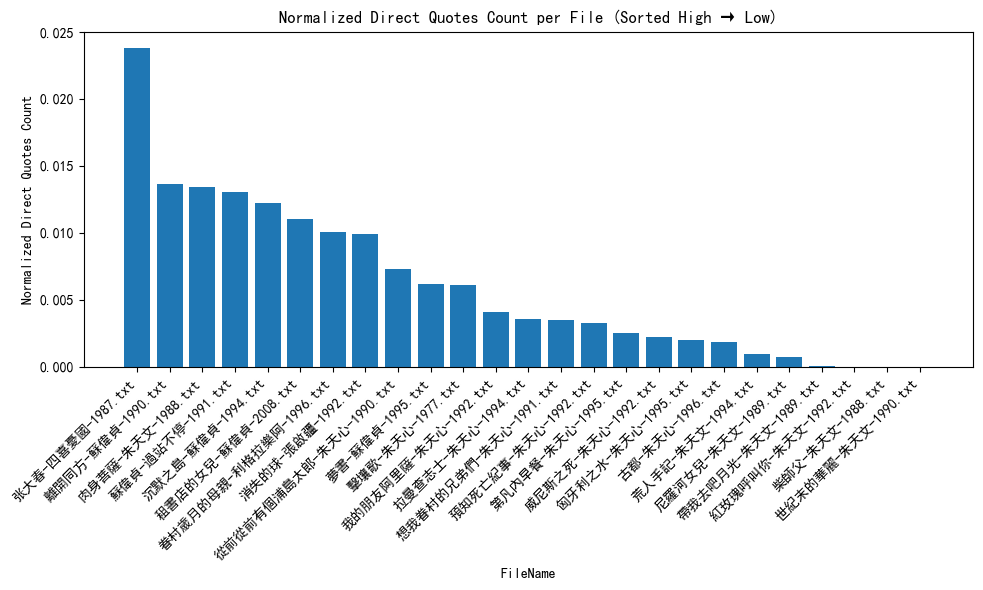

In [25]:

# 按 NormalizedDirectQuotesCount 从高到低排序
sorted_df = df.sort_values(by='NormalizedDirectQuotesCount', ascending=False)

# 画图
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['FileName'], sorted_df['NormalizedDirectQuotesCount'])
plt.xlabel('FileName')
plt.ylabel('Normalized Direct Quotes Count')
plt.title('Normalized Direct Quotes Count per File (Sorted High → Low)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
plt.rcParams['font.sans-serif'] = "SimHei"

In [18]:
from matplotlib import font_manager
print("SimHei" in [f.name for f in font_manager.fontManager.ttflist])  # should print True

True


In [17]:
import matplotlib.font_manager as fm
fm.fontManager.addfont('/opt/homebrew/Caskroom/miniforge/base/envs/ada/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')